In [1]:

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
dataset_path = '/content/drive/My Drive/dataset/names.txt'
words = open(dataset_path, 'r').read().splitlines()

In [6]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [8]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)} #a:1
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()} #-->1:a


In [47]:
def buildDataset(words):
    blocksiz = 3 #trigram
    X, Y = [], []
    for w in words:
        contxt = [0] * blocksiz
        for ch in w + '.':
            ix = stoi[ch]
            X.append(contxt)
            Y.append(ix)
            conxtxt = contxt[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

xTrain, yTrain = buildDataset(words[:n1])
xDev, yDev = buildDataset(words[n1:n2])
xTest, yTest = buildDataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [10]:
xTrain.shape, yTrain.shape

(torch.Size([182580, 3]), torch.Size([182580]))

In [41]:
#parameters
g = torch.Generator().manual_seed(2147483647)
C = torch.randn(27, 15, generator=g) #15 dims
w1 = torch.randn(45, 200, generator=g) #15*3=45 cos we've 15dim  3input layer
b1 = torch.randn(200, generator=g)
w2 = torch.randn(200, 27)
b2 = torch.randn(27, generator=g)
para = [C, w1, b1, w2, b2]

In [12]:
sum(p.nelement() for p in para)

15032

In [42]:
for p in para:
    p.requires_grad = True

In [18]:

loss_i = []
step_i = []

In [43]:

for i in range(200000):
    ix = torch.randint(0, xTrain.shape[0], (35,))
    #forwardPass
    emb = C[xTrain[ix]]
    h = torch.tanh(emb.view(-1, 45) @ w1 + b1)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits, yTrain[ix])

    #backward pass
    for p in para:
        p.grad = None
    loss.backward()

    # learning rate decay
    lr = 0.1 if i < 100000 else 0.01
    for p in para:
        p.data += -lr * p.grad
    step_i.append(i)
    loss_i.append(loss.log10().item())
print(f'Loss : {loss.item()}')




Loss : 2.9829044342041016


In [44]:
#Evaluating Loss yDev
emb = C[xDev]
h = torch.tanh(emb.view(-1, 45) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, yDev)
loss

tensor(2.8325, grad_fn=<NllLossBackward0>)

In [45]:
#Evaluating Loss Training set
emb = C[xTrain]
h = torch.tanh(emb.view(-1, 45) @ w1 + b1)
logits = h @ w2 + b2
loss = F.cross_entropy(logits, yTrain)
loss

tensor(2.8379, grad_fn=<NllLossBackward0>)

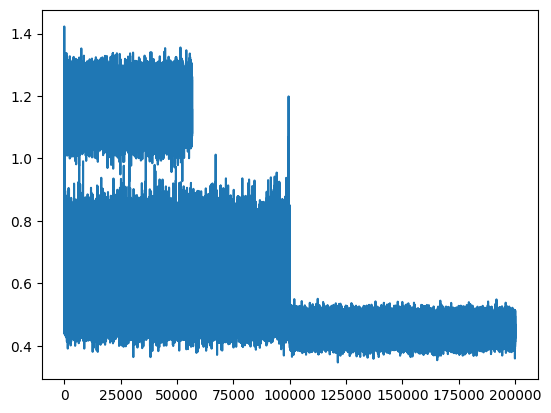

In [25]:
plt.plot(step_i, loss_i)

In [49]:
g = torch.Generator().manual_seed(2147483647 + 10)
blocksiz=3
for _ in range(20):
    out = []
    contxt = [0] * blocksiz
    while True:
        emb = C[torch.tensor([contxt])]
        h = torch.tanh(emb.view(1, -1) @ w1 + b1)
        logits = h @ w2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        contxt = contxt[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))


ersdizochcembmdeabmoeicwwewsesctkejqmuzgqsigw.
ejirdvochcembmdeabmoeicwwewowwwwwnsetoejthewowwwnseiszsmhwbtvjinzoxyimowiwwwwwnsetsejirdvochcembmdeabmoeicwxmcigtfycjbyncembmc.
ejirdvochcembpqorscicdgtzuk.
ktmbpqmuzgqsigw.
uzjixnscqc.
ljjnobidmopixmvwdmbpqxizwgsxiiwwwnsetwejthnwwqsztiejirdvochcembpqmuzgqsigw.
.
hmorydjoygmojqmuzgksjimdjtmpjqrzc.
.
aeporianoeicwcnsdtwwwwnsstixqsztiejirdvochcembpqmuzgqsigqxizwianlqmnwwqnzwqnzwmdmdwqmnwwqwwwnsetoeicwcnsdtwwwnsstixqsztiejirdvochcembpqxizwgsxixwwwnsetoeicwwewsnzwqnzsmhwbtvjimdjimdjixnscqcdgtzuksjimdjimdmdwqnzwqnzwmdmdwqmnwwqwwwnsstixqsz.
.
.
aepovhdpigzskswianlqmnwwqnzwqnzwqnzwmdmdwqmsmdwowwwnsetoeicwxmckqeuzgqsigw.
ianlqmnwwqsztiejirdvochcembpqxizwxnscqc.
ljjnmpmopixmcigtfjqjgmok.
y.
ljjnobyncembpqmuzgqsigw.
dazjtyncembpqxizwgsxiwwwwnsstixqsz.
.
ncjqmuzgksjimdmdwqmsmdwqmnwwqsztiejirdvochcembpqxizwgtzumdpdpzgizgqsigw.
